**Exploratory Data Analysis:**

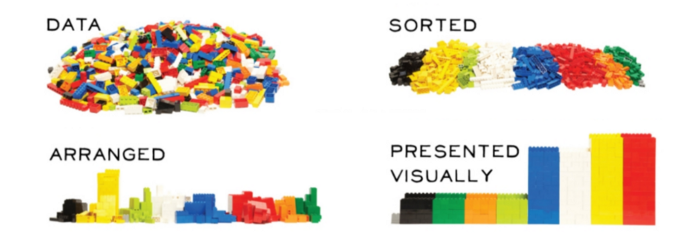

“Torture the data, and it will confess to anything.”
— Ronald Coase

Import necessary packages 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
from google.colab import files
uploaded = files.upload()

Saving SampleSuperstore.csv to SampleSuperstore.csv


Import the data

In [3]:
import io
df1 = pd.read_csv(io.BytesIO(uploaded['SampleSuperstore.csv']))

In [4]:
#check the size of the data 
df1.shape


(9994, 13)

The dataset contains 9994 Rows and 13 Columns.


In [5]:
df1.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
df1.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [7]:
df1.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
df1.nunique(axis=0)

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [9]:
df1.describe()


,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


**Data Wrangling**

1. Checking for duplicates

In [10]:
df1.duplicated().sum()

17

In [11]:
df1.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


checking for missing values 

In [12]:
df1.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

There are no missing values in our data so we can proceed further

Now we begin to understand the relationship between variables

In [13]:
#We first delete postal code data column as it does not add any value to our analysis
col=['Postal Code']
df1=df1.drop(columns=col,axis=1)


In [15]:
#Correlation Analysis
df1.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


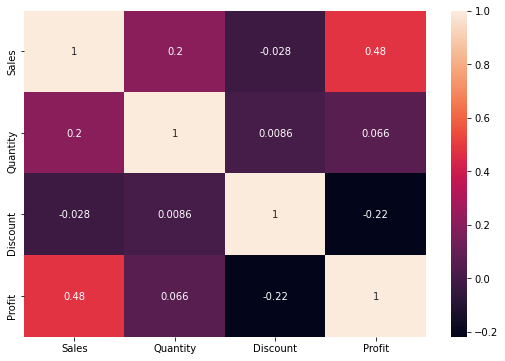

In [16]:
fig,axes = plt.subplots(1,1,figsize=(9,6))
sns.heatmap(df1.corr(), annot= True)
plt.show()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


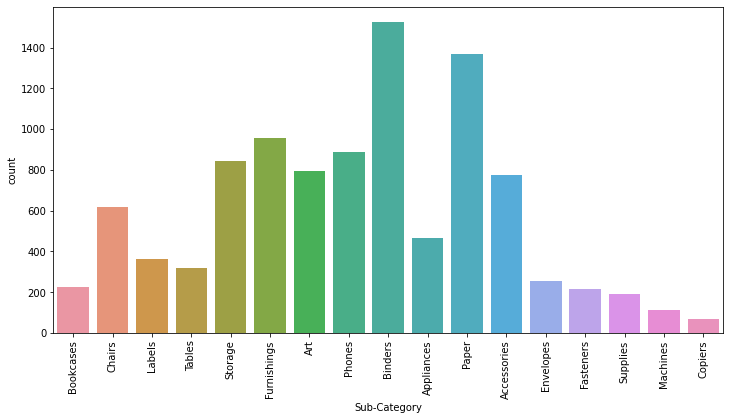

In [26]:
#subcategory of items sold
print(df1['Sub-Category'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(x=df1['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

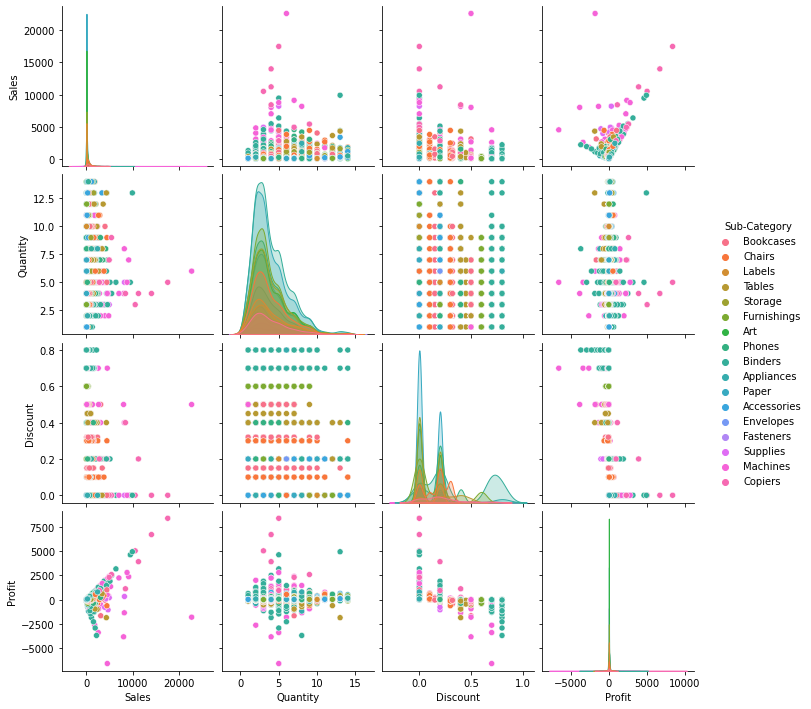

In [22]:
#Build a pairplot to study the relationship between variables highlighting the sub category of item being sold
figsize=(15,10)
sns.pairplot(df1,hue='Sub-Category')

In [31]:
### identifying categorical and numerical columns
cols = df1.columns
num_cols= df1._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
print("Numeric Columns", num_cols)
print("Categorical Columns", cat_cols)

Numeric Columns Index(['Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')
Categorical Columns ['Region', 'City', 'Ship Mode', 'Segment', 'State', 'Category', 'Country', 'Sub-Category']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


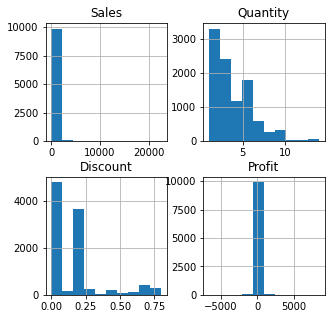

In [32]:
#Plot histogram to study distribution of numerica columns
fig = plt.figure(figsize = (5,5))
ax = fig.gca()
df1.hist(ax = ax)
plt.show()

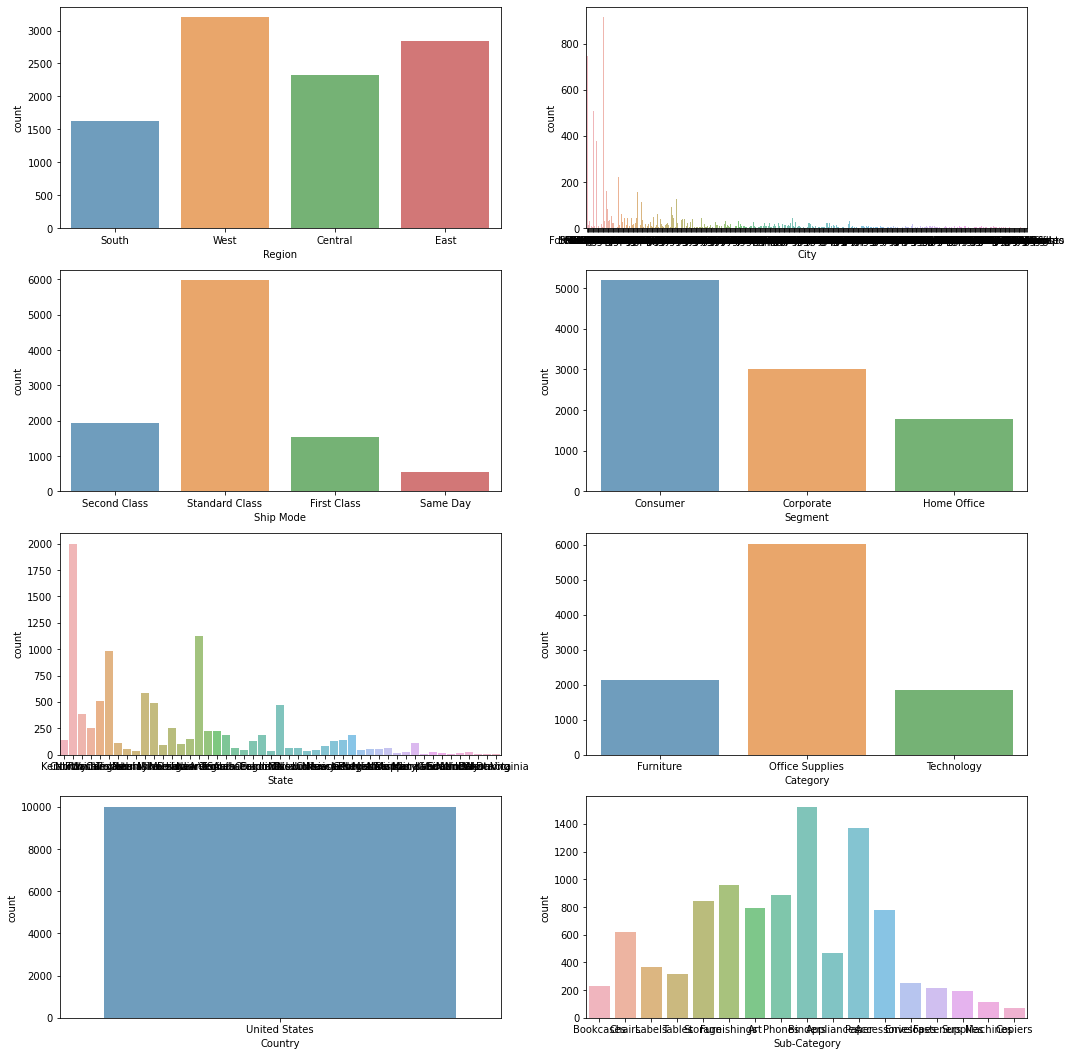

In [33]:
#Bar plots - Check frequency of feature wrt TV 

plt.figure(figsize=[15,18])
#feafures = cat_cols
n=1
for f in cat_cols:
    plt.subplot(5,2,n)
    sns.countplot(x=f, alpha=0.7, data=df1)
    n=n+1
plt.tight_layout()
plt.show()

There are 3 categories of 'Category', where “Furniture” has over 2k instances, “Office Supplies” is notably most popular with around 6k, and “Technology” has almost 2k. This clearly illustrates that data available for "Office Supplies" has almost 3 times the proportion than that for the other two categories, which will be taken note of for further data visualisations and analysis later on.

There are 3 categories of 'Segment', where “Consumer” is notably most common with over 5k instances, “Corporate” has over 3k, and “Home Office” has around 2k. This clearly illustrates that data available for "Consumer" is the sum of that of other two categories, which will be taken note of for further data visualisations and analysis later on.

There are 4 categories of 'Ship Mode', where “Standard Class” is notably most preferred with almost 6k instances, “Second Class” has almost 2k, "First Class" has over 1.5k, and “Same Day” has around 500. This clearly illustrates that data available for "Standard Class" has almost 3 times the proportion than that for "Second Class" and "First Class" categories, and 12 times that for "Same Day". This will be taken note of for further data visualisations and analysis later on.

There are 4 categories of 'Region', where “West” is the highest with over 3k instances, “East” is a close second at around 2.75k, "Central" has over 2.25k, and “South” has over 1.5. This clearly illustrates that data available for all 4 categories are differing, and this will be taken note of for further data visualisations and analysis later on.

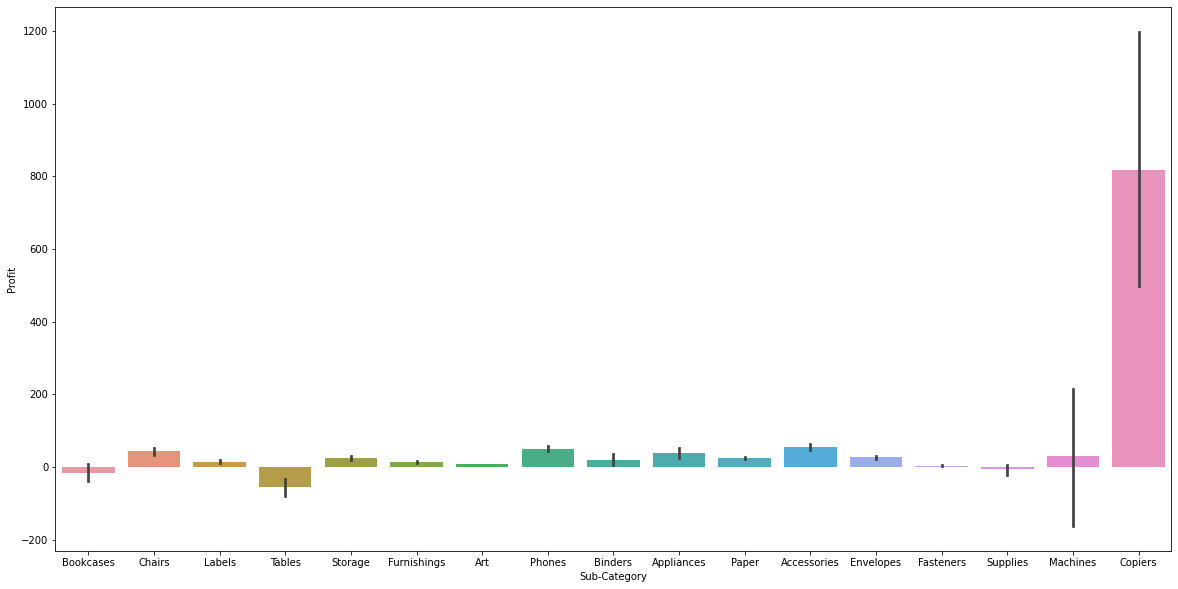

In [34]:
plt.figure(figsize=(20,10))
sns.barplot(x=df1['Sub-Category'], y=df1['Profit'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


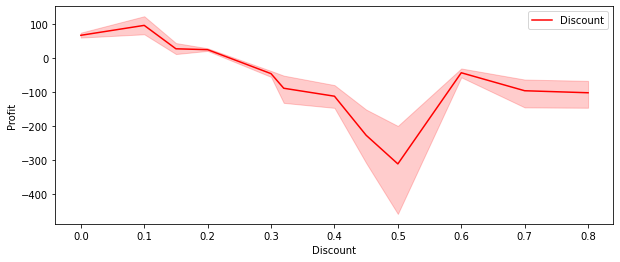

In [35]:

plt.figure(figsize = (10,4))
sns.lineplot('Discount', 'Profit', data = df1, color = 'r', label= 'Discount')
plt.legend()

Losses will likely occur for higher discount levels above 20%. In other words, between 0% and 20% of discounts, a profit can be made by reducing the occurences of lowered prices after discount deductions. As discussed before, higher discounts likely also encouraged bad consumer psychology, instead of targeting to implement discounts as a promotional strategy to successfully increase sales. A considerable number of customers may develop the thinking that Superstore's products are defective or low quality. In a long run, this can negatively affect Superstore's brand image. All in all, Superstore is advised to consider other promotional strategies.

The worst losses occured when discount approximates 50%. This may indicate festivals, end-of-season sales, and clearance sales for older designs.

Superstore is most profitable when discount levels lower than 10% are offered. This allows less occurences of lowered prices after discount deductions, and thus larger profit margins and profits.

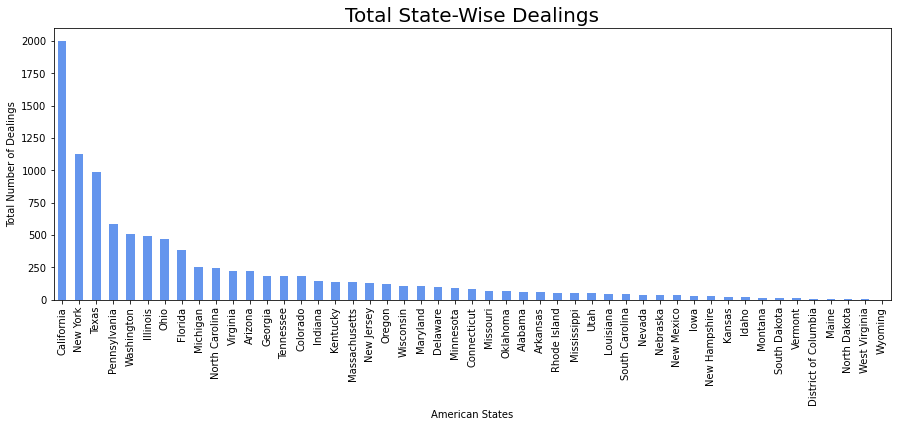

In [27]:
# total dealings for each State
df_state_dealings = df1.groupby('State')['Quantity'].count().sort_values(ascending = False).plot.bar(figsize = (15, 5), 
                                                                                                    color = 'Cornflowerblue')
plt.ylabel('Total Number of Dealings')
plt.xlabel('American States')
plt.title('Total State-Wise Dealings', fontsize = 20)
plt.show()

Superstore has the notable highest dealings in the state of California, with almost 2K of total dealings.

With a big trailing gap, New York has the second highest dealings, with around 1,125 of total dealings.

Texas is third with almost 1K of total dealings.

The states of District of Columbia, Maine, North Dakota, West Virginia, and Wyoming have comparatively negligible dealings. Even if the Superstore outlets here are newly opened, marketing strategies should be improved in these areas as well as the states with less than 100 total dealings.

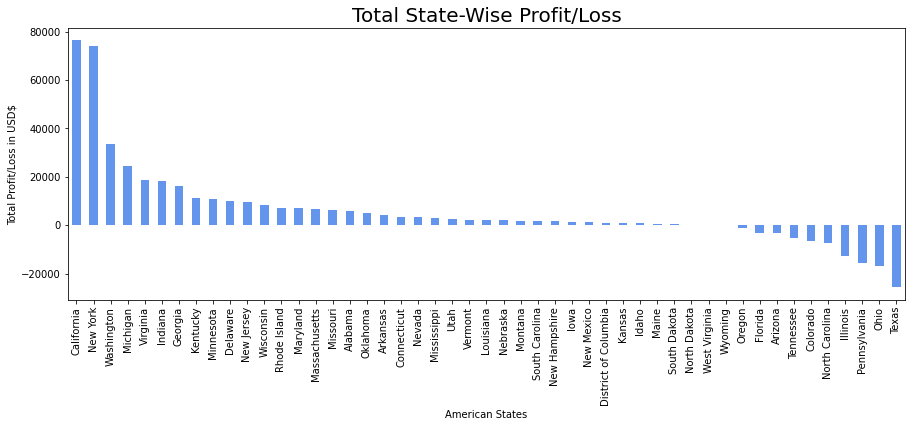

In [28]:
# analysis on state-wise profit/loss and the effect of discount. total Profit for each State
df_state_profit = df1.groupby('State')['Profit'].sum().sort_values(ascending = False).plot.bar(figsize = (15, 5), 
                                                                                              color = 'Cornflowerblue')
plt.ylabel('Total Profit/Loss in USD$')
plt.xlabel('American States')
plt.title('Total State-Wise Profit/Loss', fontsize = 20)
plt.show()

California and New York retained their top 2 places, with the notably higher total profits of around USD$75k.

With a big trailing gap, Washington is third with around USD$35k of total profits.

Texas, despite having the third highest dealings and sales, suffered the highest loss of around USD$25k. This may be due to it having the second highest discount level. Superstore is advised to reduce discount levels in Texas, and instead switch to other promotional strategies, in order to minimise losses.

Pennsylvania, Illinois, and Ohio are the third, first, and fourth state offering larger discounts respectively, and this may be the reason behind them resulting in the third, fourth, and second biggest loss of around USD$15k. As in the previous point, Superstore is advised to switch to a different promotional strategy.

California gives out considerably lower discounts, which may be one of the main reasons behind it being top in sales and profits by a significant margin. This is indicative that the promotional strategy of offering slight discounts is highly effective in the state of California.

More than half the states make little to no profit, and a significant number of these even suffer from a notable loss.

A majority of states offer slight discounts under 10%.



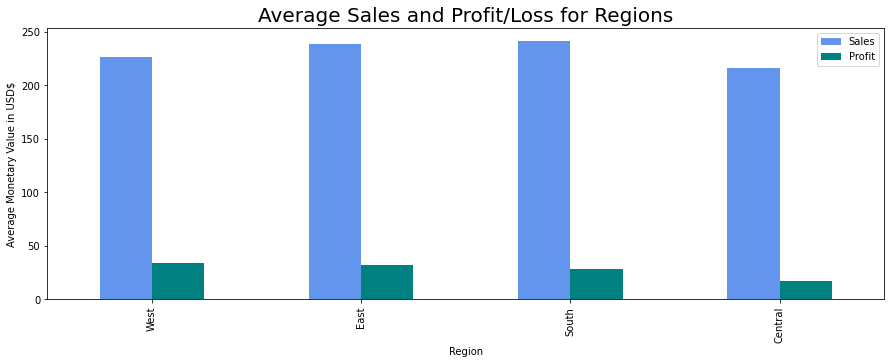

In [30]:
# average Sales and profit/loss for Region
colors = ['Cornflowerblue', 'Teal']
df_region = df1.groupby(['Region'])[['Sales', 'Discount', 'Profit']].mean()
df_region.sort_values('Profit', ascending = False)[['Sales', 'Profit']].plot(kind = 'bar',
                                                                             figsize = (15, 5),
                                                                             color = colors)

plt.ylabel('Average Monetary Value in USD$')
plt.xlabel('Region')
plt.title('Average Sales and Profit/Loss for Regions', fontsize = 20)
plt.show()

All regions have similar sales and profit. This is indicative that region has little effect on profits.

For Superstore outlets that are newly opened, marketing strategies should be one of the main focuses to ensure increasing profitable sales and consistent future gains in long term customers.

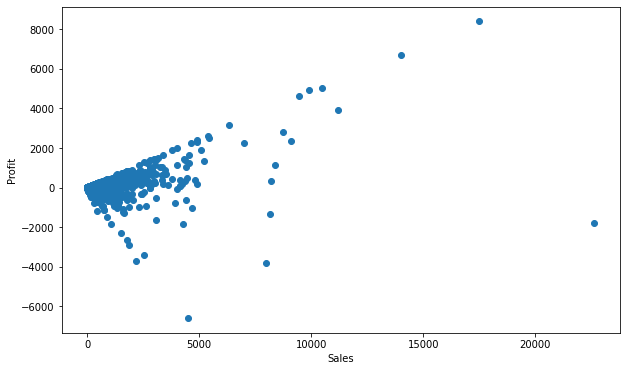

In [36]:
fig, ax = plt.subplots(figsize = (10 , 6))
ax.scatter(df1["Sales"] , df1["Profit"])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()


Most sales are less than USD$5k. This is likely because a majority of the Superstore's customers are of the Consumer Segment - individuals who tend to buy and spend less than the other customer Segments comprising of groups and teams from Corporates and Home Offices.

A significant number of transactions under USD$2.5k result in a loss. One likely reason behind smaller transaction amounts is after accounting for higher discount deductions, where this will decrease overall profits and can even cause a loss.

Larger sales above USD$2.5k are very likely to result in a profit. Profit margins may be higher, after economies of scale in cost components such as procurement, packaging, and delivery.

**Conclusion:**

Discounts affect profits.
In total, losses amount to USD$35k when there are discounts, as compared to a profit of USD\$321K when there are no discounts. Despite this, the Superstore cannont escape from giving out discounts on their products, especially during festivals, end-of-season sales, and clearance sales that are necessary to make space in their warehouses for newer and more current stocks. Instead, Superstore is advised to reduce overall discount levels to minimise losses, and focus on implementing other promotional strategies to ensure increasing profitable sales and consistent future gains in long term customers.